# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [261]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [262]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [263]:
df_raw.shape[0]

400

#### Question 2. Create a summary table

In [264]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [265]:
import statsmodels.formula.api as smf

In [266]:
lm = smf.ols(formula='admit ~ gre + gpa + prestige', data=df_raw).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           1.65e-08
Time:                        14:30:48   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.4

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: They are not on the same scale

#### Question 4. Drop data points with missing data


In [267]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [268]:
df_raw.gre.dropna(axis=0, how='any', inplace=True)
df_raw.gpa.dropna(axis=0, how='any', inplace=True)
df_raw.prestige.dropna(axis=0, how='any', inplace=True)

In [269]:
print(df_raw.admit.isnull().value_counts()),
print(df_raw.gre.isnull().value_counts()),
print(df_raw.gpa.isnull().value_counts()),
print(df_raw.prestige.isnull().value_counts())

False    400
Name: admit, dtype: int64 False    398
Name: gre, dtype: int64 False    398
Name: gpa, dtype: int64 False    399
Name: prestige, dtype: int64


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: df_raw.info shows that there are only non-null values inthe dataframe

In [270]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.5 KB


#### Question 6. Create box plots for GRE and GPA

In [271]:
import seaborn as sns

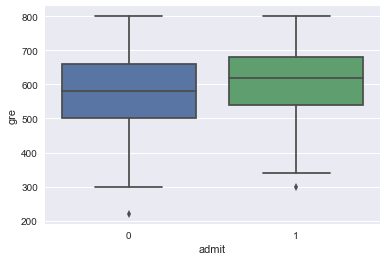

In [276]:
#boxplot 1
sns.boxplot( "admit", "gre", data = df_raw )

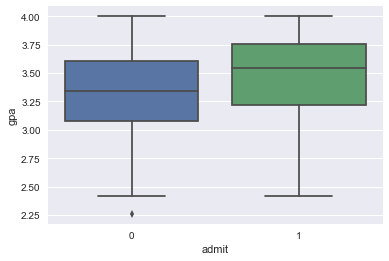

In [277]:
#boxplot 2
sns.boxplot( "admit", "gpa", data = df_raw )

#### Question 7. What do this plots show?

Answer:   
##### gre
- admitted shows higher gre scores than not admitted
- minimum is an outlier, 
- the median is 580, 
- 800 is the max, 
- data is mostly in high end

##### gpa
- admitted shows higher gpa scores than not admitted
- minimum is an outlier, 
- the median is 3.4, 
- 4 is the max, 
- data is mostly in the high end

#### Question 8. Describe each distribution 

admit: distribution is skewed right, but there are only two bins, first peak has a high kurtosis, and second is low by comparison

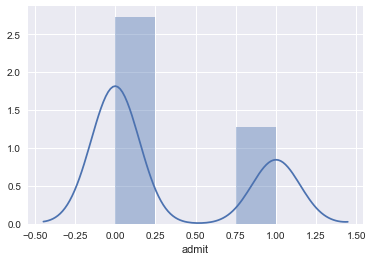

In [284]:
# plot the distribution of each variable 
sns.distplot( df_raw["admit"] )

gre: distribution is skewed left with a high kurtosis

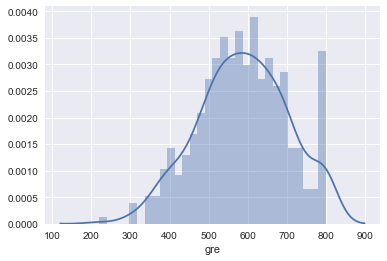

In [285]:
sns.distplot( df_raw["gre"] , bins=30)

gpa: distribution is skewed left with a high kurtosis

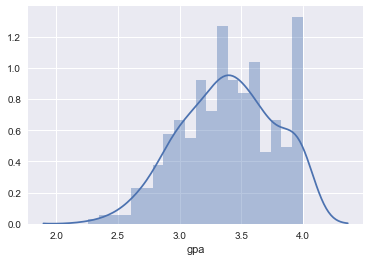

In [286]:
sns.distplot( df_raw["gpa"], bins=20)

prestige: the distribution has many peaks, distribution appears to be random

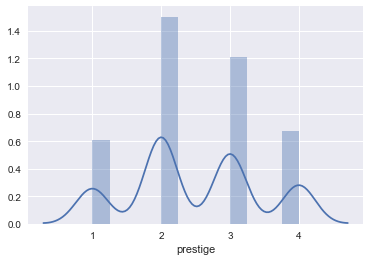

In [287]:
sns.distplot( df_raw["prestige"] )

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, all the data is skewed

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer:   
- We could scale the gpa and the gre scores so that they can be compared more easily

#### Question 11. Which of our variables are potentially colinear? 

In [257]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.188281,0.133508,-0.248225
gre,0.188281,1.000000,0.396194,-0.107757
gpa,0.133508,0.396194,1.000000,0.009362
prestige,-0.248225,-0.107757,0.009362,1.000000


In [258]:
df_raw.fillna(value=0, inplace=True)

gre and gpa are potentially collinear, but their relationship is below 75%, so I'd say no

#### Question 12. What did you find?

Answer: 
low levels of collinearity might suggest that the relationship between the variables is not linear

gre might have multiple modes based on the shape of the histogram


#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

Analyze the association between 'admit' and 'prestige', combining it with 'gre' and 'gpa' to find out if the associations are stronger or weaker when combining features

#### Question 14. What is your hypothesis? 

Answer: 
H0: there is no relationship between admissions and prestige

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Filling values depends on what your expected outcome will be.
could also fill values with an approprate value...
- if categorical, fill with median
- if continuous, fill with mean
- if binary, fill with mode


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data